In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplot 한글폰트 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\GULIM.TTC").get_name()
plt.rc("font", family = font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]= False

## 서울 자치구별 전월세전환율 2018 - 2022년 까지의 %  dataframe 구축
### 월세가를 아파트 전세가로 변환하여 수치를 동일화 시키기 위함
#### 월세에서 전세 전환식 = 월세 보증금 + (월차임 * 12개월) / 지역별 전월세전환율

## 지역별 전월세전환율 Data source 2018~2022
### https://kosis.kr/search/search.do

In [2]:
# 아파트 매매가격 대비 전세가격 비율 2018 - 2022
apt_rent_rate = pd.read_csv(r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/지역별_전월세전환율_2018-2022.csv", encoding='euc-kr')
apt_rent_rate.head()


,주택유형별(1),지역별(1),지역별(2),지역별(3),지역별(4),2018.01,2018.02,2018.03,2018.04,2018.05,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종합,서울,소계,소계,소계,5.3,5.3,5.4,5.4,5.4,...,4.7,4.8,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9
1,종합,서울,강북권역,소계,소계,5.6,5.6,5.7,5.7,5.7,...,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.1,5.2
2,종합,서울,강북권역,도심권,소계,5.7,5.9,5.9,5.9,6.0,...,5.2,5.2,5.2,5.2,5.3,5.2,5.2,5.2,5.2,5.3
3,종합,서울,강북권역,동북권,소계,5.6,5.6,5.7,5.6,5.7,...,5.1,5.2,5.2,5.2,5.3,5.3,5.2,5.2,5.2,5.2
4,종합,서울,강북권역,서북권,소계,4.5,4.5,4.5,4.6,4.6,...,5.0,5.0,5.0,5.0,5.0,5.1,5.1,5.1,5.0,5.2


In [3]:
#불필요한 columns 확인 - '주택유형별(1)', '지역별(1)', '지역별(2)', '지역별(3)'
apt_rent_rate.columns


Index(['주택유형별(1)', '지역별(1)', '지역별(2)', '지역별(3)', '지역별(4)', '2018.01',
       '2018.02', '2018.03', '2018.04', '2018.05', '2018.06', '2018.07',
       '2018.08', '2018.09', '2018.10', '2018.11', '2018.12', '2019.01',
       '2019.02', '2019.03', '2019.04', '2019.05', '2019.06', '2019.07',
       '2019.08', '2019.09', '2019.10', '2019.11', '2019.12', '2020.01',
       '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07',
       '2020.08', '2020.09', '2020.10', '2020.11', '2020.12', '2021.01',
       '2021.02', '2021.03', '2021.04', '2021.05', '2021.06', '2021.07',
       '2021.08', '2021.09', '2021.10', '2021.11', '2021.12', '2022.01',
       '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07',
       '2022.08', '2022.09', '2022.10', '2022.11', '2022.12'],
      dtype='object')

In [4]:
#불필요한 columns 제거 - '주택유형별(1)', '지역별(1)', '지역별(2)', '지역별(3)'

apt_rent_rate.drop(columns=['주택유형별(1)', '지역별(1)',
                   '지역별(2)', '지역별(3)'], inplace=True)
apt_rent_rate


,지역별(4),2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,5.3,5.3,5.4,5.4,5.4,5.4,5.4,5.4,5.4,...,4.7,4.8,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9
1,소계,5.6,5.6,5.7,5.7,5.7,5.7,5.7,5.6,5.6,...,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.1,5.2
2,소계,5.7,5.9,5.9,5.9,6.0,6.0,6.1,5.8,5.7,...,5.2,5.2,5.2,5.2,5.3,5.2,5.2,5.2,5.2,5.3
3,소계,5.6,5.6,5.7,5.6,5.7,5.7,5.7,5.6,5.6,...,5.1,5.2,5.2,5.2,5.3,5.3,5.2,5.2,5.2,5.2
4,소계,4.5,4.5,4.5,4.6,4.6,4.6,4.7,4.7,4.6,...,5.0,5.0,5.0,5.0,5.0,5.1,5.1,5.1,5.0,5.2
5,소계,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.2,...,4.5,4.5,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.7
6,소계,5.6,5.6,5.6,5.6,5.7,5.7,5.6,5.5,5.5,...,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9
7,소계,5.6,5.6,5.7,5.6,5.7,5.8,5.7,5.7,5.6,...,4.2,4.2,4.2,4.3,4.3,4.3,4.3,4.3,4.3,4.3
8,소계,4.0,4.0,4.0,4.0,4.1,4.1,4.1,4.1,4.0,...,4.2,4.2,4.2,4.2,4.3,4.3,4.3,4.3,4.4,4.4
9,소계,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.3,4.4,4.3,4.4,4.4,4.4,4.4,4.5,4.5,4.6


In [5]:
#시군구 column 자치구별로 변동
apt_rent_rate.rename(columns={'지역별(4)': '자치구별'}, inplace=True)
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,5.3,5.3,5.4,5.4,5.4,5.4,5.4,5.4,5.4,...,4.7,4.8,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9
1,소계,5.6,5.6,5.7,5.7,5.7,5.7,5.7,5.6,5.6,...,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.1,5.2
2,소계,5.7,5.9,5.9,5.9,6.0,6.0,6.1,5.8,5.7,...,5.2,5.2,5.2,5.2,5.3,5.2,5.2,5.2,5.2,5.3
3,소계,5.6,5.6,5.7,5.6,5.7,5.7,5.7,5.6,5.6,...,5.1,5.2,5.2,5.2,5.3,5.3,5.2,5.2,5.2,5.2
4,소계,4.5,4.5,4.5,4.6,4.6,4.6,4.7,4.7,4.6,...,5.0,5.0,5.0,5.0,5.0,5.1,5.1,5.1,5.0,5.2


In [6]:
#자치구별 column에서 소계 확인
apt_rent_rate['자치구별'].unique()


array(['소계', '종로', '중', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북', '도봉',
       '노원', '은평', '서대문', '마포', '양천', '강서', '구로', '금천', '영등포', '동작', '관악',
       '서초', '강남', '송파', '강동'], dtype=object)

In [7]:
#자치구별 column에서 소계가 포함된 행 제거
apt_rent_rate = apt_rent_rate[apt_rent_rate['자치구별'] != '소계']
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
11,종로,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
12,중,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
13,용산,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
15,성동,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
16,광진,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [8]:
#데이터프레임 인덱스 리셋
apt_rent_rate.reset_index(drop=True, inplace=True)
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [9]:
#'자치구별' column value에 '구' 추가해서 자치구 이름 변경
addname = apt_rent_rate['자치구별'].unique()

#for 구문으로 '자치구별' value에 '구'추가해주기
addname_gu = [name + '구' for name in addname]
apt_rent_rate['자치구별'] = addname_gu

#결과확인
apt_rent_rate.head()


C:\Users\acorn\AppData\Local\Temp\ipykernel_13916\2973746249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_rent_rate['자치구별'] = addname_gu


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [10]:
apt_rent_rate.columns.unique()


Index(['자치구별', '2018.01', '2018.02', '2018.03', '2018.04', '2018.05',
       '2018.06', '2018.07', '2018.08', '2018.09', '2018.10', '2018.11',
       '2018.12', '2019.01', '2019.02', '2019.03', '2019.04', '2019.05',
       '2019.06', '2019.07', '2019.08', '2019.09', '2019.10', '2019.11',
       '2019.12', '2020.01', '2020.02', '2020.03', '2020.04', '2020.05',
       '2020.06', '2020.07', '2020.08', '2020.09', '2020.10', '2020.11',
       '2020.12', '2021.01', '2021.02', '2021.03', '2021.04', '2021.05',
       '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11',
       '2021.12', '2022.01', '2022.02', '2022.03', '2022.04', '2022.05',
       '2022.06', '2022.07', '2022.08', '2022.09', '2022.10', '2022.11',
       '2022.12'],
      dtype='object')

In [11]:
#save point 데이터 저장하기
apt_rent_rate.to_csv(
    r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/자치구별_전월세전환율_2018-2022.csv", encoding='utf-8')


In [12]:
#데이터 불러와서 재확인
df = pd.read_csv(r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/자치구별_전월세전환율_2018-2022.csv", encoding='utf-8',index_col=0)
df.head()

,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [13]:
# 2018~2022년도별로 월별 전월세전환율 데이터프레임 생성하여 CSV 파일로 저장
import os

for year in range(2018, 2023):
    year_cols = [col for col in df.columns if col.startswith(str(year) + ".")]
    year_df = df[['자치구별'] + year_cols]

    # 폴더가 없으면 생성
    path = "C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산"
    if not os.path.exists(path):
        os.makedirs(path)

    # 파일 저장
    year_df.to_csv(f"{path}/자치구별_전월세전환율_{year}.csv", index=False)


In [14]:
df.head()

,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


# 아파트 전세, 월세 실거래가 전처리

In [15]:
#아파트 전세,월세 실거래가 가져오기 및 필요없는 행 제거
rent_df = pd.read_csv(
    r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/아파트(전월세)_실거래가_2018_국토교통부.csv", encoding='euc-kr',
    skiprows=15)
rent_df.head()


C:\Users\acorn\AppData\Local\Temp\ipykernel_13916\2094298918.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  rent_df = pd.read_csv(


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201803,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201807,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,201802,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201804,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201805,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN


In [16]:
rent_df['계약년월'] = rent_df['계약년월'].astype(
    str).apply(lambda x: x[:4] + '.' + x[4:6])
rent_df.info()
rent_df['계약년월']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168437 entries, 0 to 168436
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구            168437 non-null  object 
 1   번지             168365 non-null  object 
 2   본번             168414 non-null  float64
 3   부번             168414 non-null  float64
 4   단지명            168437 non-null  object 
 5   전월세구분          168437 non-null  object 
 6   전용면적(㎡)        168437 non-null  float64
 7   계약년월           168437 non-null  object 
 8   계약일            168437 non-null  int64  
 9   보증금(만원)        168437 non-null  object 
 10  월세(만원)         168437 non-null  object 
 11  층              168437 non-null  int64  
 12  건축년도           168437 non-null  int64  
 13  도로명            168437 non-null  object 
 14  계약기간           168437 non-null  object 
 15  계약구분           168437 non-null  object 
 16  갱신요구권 사용       168437 non-null  object 
 17  종전계약 보증금 (만원)  0 non-null    

0         2018.03
1         2018.07
2         2018.02
3         2018.04
4         2018.05
           ...   
168432    2018.12
168433    2018.12
168434    2018.12
168435    2018.12
168436    2018.01
Name: 계약년월, Length: 168437, dtype: object

In [17]:
rent_df.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.03,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.07,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,2018.02,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.04,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.05,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN


In [18]:
#데이터 프레임 카피 만들기
df1 = rent_df.copy()
df1.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.03,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.07,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,2018.02,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.04,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.05,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN


# 전세, 월세 아파트 전세가로 수치변환
### 아파트 전세 가격일 경우 그대로 전세가로 사용함
### 아파트 월세 가격일 경우
#### 월세를 전세가격으로 변환 후 전세가격
#### 보증금 + (월세 * 12개월) / 자치구별 전월세변환율 = 월세가격 변환

In [19]:
df1.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '보증금(만원)', '월세(만원)', '층', '건축년도', '도로명', '계약기간', '계약구분', '갱신요구권 사용',
       '종전계약 보증금 (만원)', '종전계약 월세 (만원)'],
      dtype='object')

In [20]:
df1.isnull().sum()
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168437 entries, 0 to 168436
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구            168437 non-null  object 
 1   번지             168365 non-null  object 
 2   본번             168414 non-null  float64
 3   부번             168414 non-null  float64
 4   단지명            168437 non-null  object 
 5   전월세구분          168437 non-null  object 
 6   전용면적(㎡)        168437 non-null  float64
 7   계약년월           168437 non-null  object 
 8   계약일            168437 non-null  int64  
 9   보증금(만원)        168437 non-null  object 
 10  월세(만원)         168437 non-null  object 
 11  층              168437 non-null  int64  
 12  건축년도           168437 non-null  int64  
 13  도로명            168437 non-null  object 
 14  계약기간           168437 non-null  object 
 15  계약구분           168437 non-null  object 
 16  갱신요구권 사용       168437 non-null  object 
 17  종전계약 보증금 (만원)  0 non-null    

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.03,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.07,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,2018.02,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.04,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.05,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN


In [21]:
df1.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.03,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.07,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,2018.02,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.04,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.05,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN


In [22]:
# 보증금(만원)과 월세(만원) column을 숫자형으로 변환
df1['보증금(만원)'] = df1['보증금(만원)'].str.replace(',', '').astype(int)



In [23]:
df1['월세(만원)'].isnull().sum()


0

In [24]:
#월세 결측치 처리
df1['월세(만원)'] = df1['월세(만원)'].str.replace(',','').fillna(0).astype(int)


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168437 entries, 0 to 168436
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구            168437 non-null  object 
 1   번지             168365 non-null  object 
 2   본번             168414 non-null  float64
 3   부번             168414 non-null  float64
 4   단지명            168437 non-null  object 
 5   전월세구분          168437 non-null  object 
 6   전용면적(㎡)        168437 non-null  float64
 7   계약년월           168437 non-null  object 
 8   계약일            168437 non-null  int64  
 9   보증금(만원)        168437 non-null  int32  
 10  월세(만원)         168437 non-null  int32  
 11  층              168437 non-null  int64  
 12  건축년도           168437 non-null  int64  
 13  도로명            168437 non-null  object 
 14  계약기간           168437 non-null  object 
 15  계약구분           168437 non-null  object 
 16  갱신요구권 사용       168437 non-null  object 
 17  종전계약 보증금 (만원)  0 non-null    

In [26]:
#월세와 보증금 모두 0인 데이터 확인
zero_rent_deposit_count = ((df1['월세(만원)'] == 0) & (df1['보증금(만원)'] == 0)).sum()
print("월세와 보증금 모두 0인 데이터 개수:", zero_rent_deposit_count)


월세와 보증금 모두 0인 데이터 개수: 21


In [27]:
a = df1['보증금(만원)'].isna().sum()
b = df1['월세(만원)'].isna().sum()
print(a, b)


0 0


In [28]:
#월세와 보증금 모두 0 인 데이터 제거
df1 = df1[(df1['보증금(만원)'] != 0) | (df1['월세(만원)'] != 0)]
df1

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.03,29,3865,17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.07,14,3062,7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,2018.02,3,39000,30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.04,11,52000,0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.05,15,50000,0,5,1988,언주로 103,-,-,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168432,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,84.03,2018.12,22,34000,0,4,1997,동일로 752,-,-,-,NaN,NaN
168433,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,50.37,2018.12,25,27000,0,20,1997,동일로 752,-,-,-,NaN,NaN
168434,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,59.76,2018.12,28,29000,0,13,1997,동일로 752,-,-,-,NaN,NaN
168435,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,59.76,2018.12,28,29500,0,9,1997,동일로 752,-,-,-,NaN,NaN


In [29]:
#월세와 보증금 모두 0인 데이터 확인
zero_rent_deposit_count = ((df1['월세(만원)'] == 0) & (df1['보증금(만원)'] == 0)).sum()
print("월세와 보증금 모두 0인 데이터 개수:", zero_rent_deposit_count)


월세와 보증금 모두 0인 데이터 개수: 0


In [30]:
#리스트 결측치 채워넣기, 확인
df1.index = range(len(df1))
df1


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.03,29,3865,17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,2018.07,14,3062,7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,2018.02,3,39000,30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.04,11,52000,0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,2018.05,15,50000,0,5,1988,언주로 103,-,-,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168411,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,84.03,2018.12,22,34000,0,4,1997,동일로 752,-,-,-,NaN,NaN
168412,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,50.37,2018.12,25,27000,0,20,1997,동일로 752,-,-,-,NaN,NaN
168413,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,59.76,2018.12,28,29000,0,13,1997,동일로 752,-,-,-,NaN,NaN
168414,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,59.76,2018.12,28,29500,0,9,1997,동일로 752,-,-,-,NaN,NaN


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168416 entries, 0 to 168415
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구            168416 non-null  object 
 1   번지             168344 non-null  object 
 2   본번             168393 non-null  float64
 3   부번             168393 non-null  float64
 4   단지명            168416 non-null  object 
 5   전월세구분          168416 non-null  object 
 6   전용면적(㎡)        168416 non-null  float64
 7   계약년월           168416 non-null  object 
 8   계약일            168416 non-null  int64  
 9   보증금(만원)        168416 non-null  int32  
 10  월세(만원)         168416 non-null  int32  
 11  층              168416 non-null  int64  
 12  건축년도           168416 non-null  int64  
 13  도로명            168416 non-null  object 
 14  계약기간           168416 non-null  object 
 15  계약구분           168416 non-null  object 
 16  갱신요구권 사용       168416 non-null  object 
 17  종전계약 보증금 (만원)  0 non-null    

In [32]:
# 컬럼의 순서(위치) 바꾸기
cols = ['시군구', '전용면적(㎡)', '계약년월', '전월세구분', '보증금(만원)', '월세(만원)']
df2 = pd.DataFrame(df1, columns = cols)
df2


,시군구,전용면적(㎡),계약년월,전월세구분,보증금(만원),월세(만원)
0,서울특별시 강남구 개포동,25.35,2018.03,월세,3865,17
1,서울특별시 강남구 개포동,25.35,2018.07,월세,3062,7
2,서울특별시 강남구 개포동,77.75,2018.02,월세,39000,30
3,서울특별시 강남구 개포동,77.75,2018.04,전세,52000,0
4,서울특별시 강남구 개포동,77.75,2018.05,전세,50000,0
...,...,...,...,...,...,...
168411,서울특별시 중랑구 중화동,84.03,2018.12,전세,34000,0
168412,서울특별시 중랑구 중화동,50.37,2018.12,전세,27000,0
168413,서울특별시 중랑구 중화동,59.76,2018.12,전세,29000,0
168414,서울특별시 중랑구 중화동,59.76,2018.12,전세,29500,0


In [33]:
#시군구 column 자치구별로 변동
df2.rename(columns = {'시군구':'자치구별'}, inplace = True)

In [34]:
#자치구별 주소 구로만 가져오기
df2['자치구별'] = df2['자치구별'].str.split().str[1]
df2


,자치구별,전용면적(㎡),계약년월,전월세구분,보증금(만원),월세(만원)
0,강남구,25.35,2018.03,월세,3865,17
1,강남구,25.35,2018.07,월세,3062,7
2,강남구,77.75,2018.02,월세,39000,30
3,강남구,77.75,2018.04,전세,52000,0
4,강남구,77.75,2018.05,전세,50000,0
...,...,...,...,...,...,...
168411,중랑구,84.03,2018.12,전세,34000,0
168412,중랑구,50.37,2018.12,전세,27000,0
168413,중랑구,59.76,2018.12,전세,29000,0
168414,중랑구,59.76,2018.12,전세,29500,0


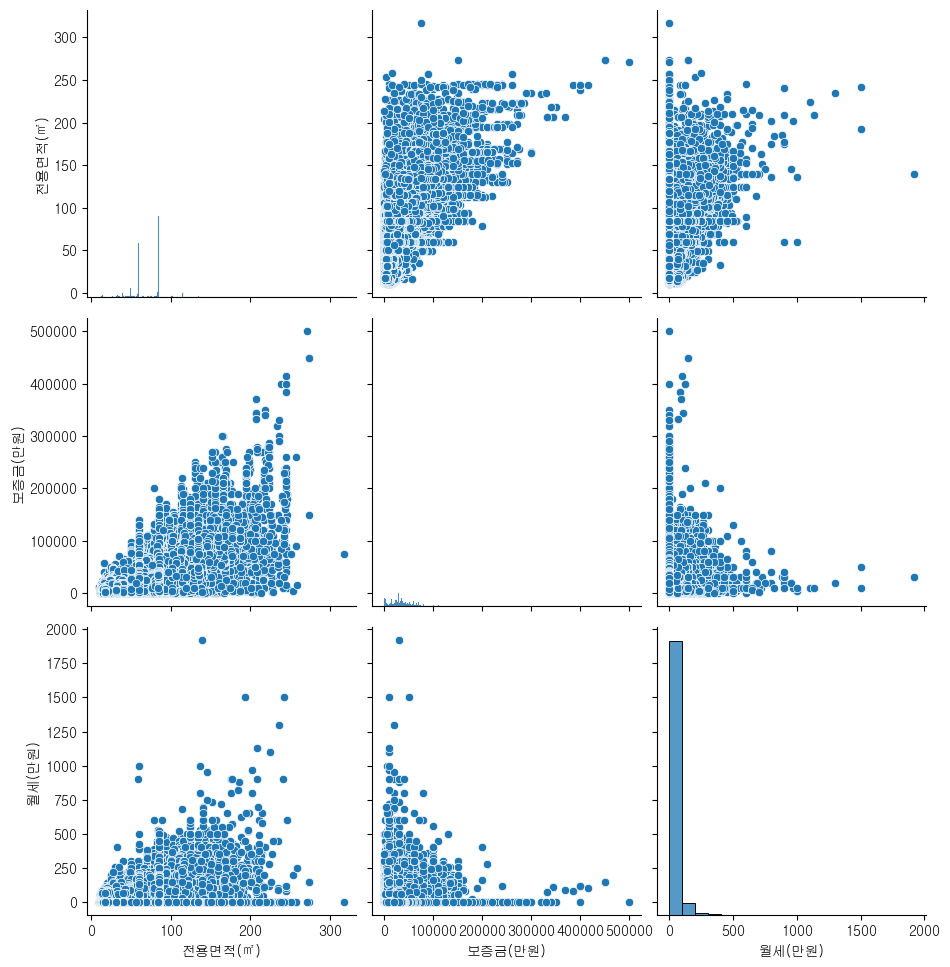

In [35]:
fig = sns.pairplot(data=df2)
fig.fig.set_size_inches (10, 10)
plt.show()


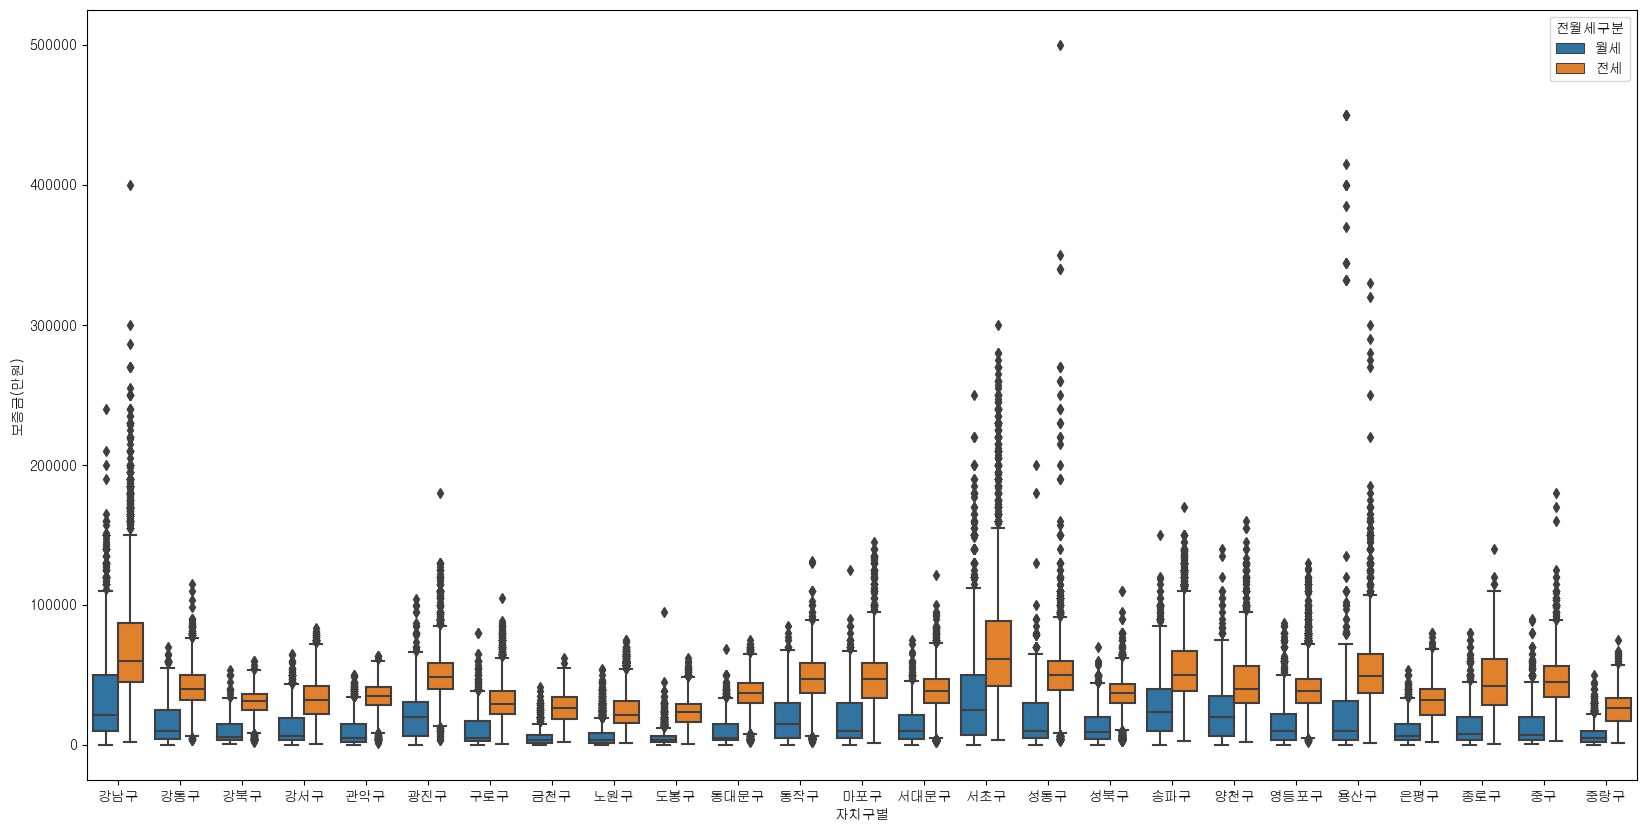

In [36]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='자치구별', y='보증금(만원)', hue='전월세구분', data=df2)
plt.show()

In [37]:
#df1
#df1[df1['보증금(만원)']==400000]


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
7907,서울특별시 강남구 삼성동,65-4,65.0,4.0,상지리츠빌카일룸(65-4),전세,237.7400,2018.02,2,400000,0,3,2012,삼성로 636,-,-,-,NaN,NaN
155411,서울특별시 용산구 한남동,829,829.0,0.0,나인원한남,월세,244.3478,2018.07,13,400000,120,5,2019,한남대로 91,-,-,-,NaN,NaN
155416,서울특별시 용산구 한남동,829,829.0,0.0,나인원한남,월세,244.3478,2018.07,16,400000,120,4,2019,한남대로 91,-,-,-,NaN,NaN
155419,서울특별시 용산구 한남동,829,829.0,0.0,나인원한남,월세,244.3478,2018.07,23,400000,120,5,2019,한남대로 91,-,-,-,NaN,NaN


In [55]:
#이상치 확인시 df1 불러와서 data detail 보고 df2
#df2[df2['자치구별'] == "강남구"].sort_values(by='보증금(만원)', ascending=False)

,자치구별,전용면적(㎡),계약년월,전월세구분,보증금(만원),월세(만원)
7907,강남구,237.740,2018.02,전세,400000,0
15077,강남구,166.010,2018.06,전세,300000,0
6698,강남구,223.590,2018.04,전세,286000,0
7492,강남구,170.020,2018.03,전세,270000,0
6754,강남구,214.967,2018.02,전세,270000,0
...,...,...,...,...,...,...
7414,강남구,21.240,2018.07,월세,50,31
2334,강남구,59.980,2018.05,월세,30,30
9722,강남구,33.180,2018.03,월세,0,75
10806,강남구,84.980,2018.05,월세,0,50


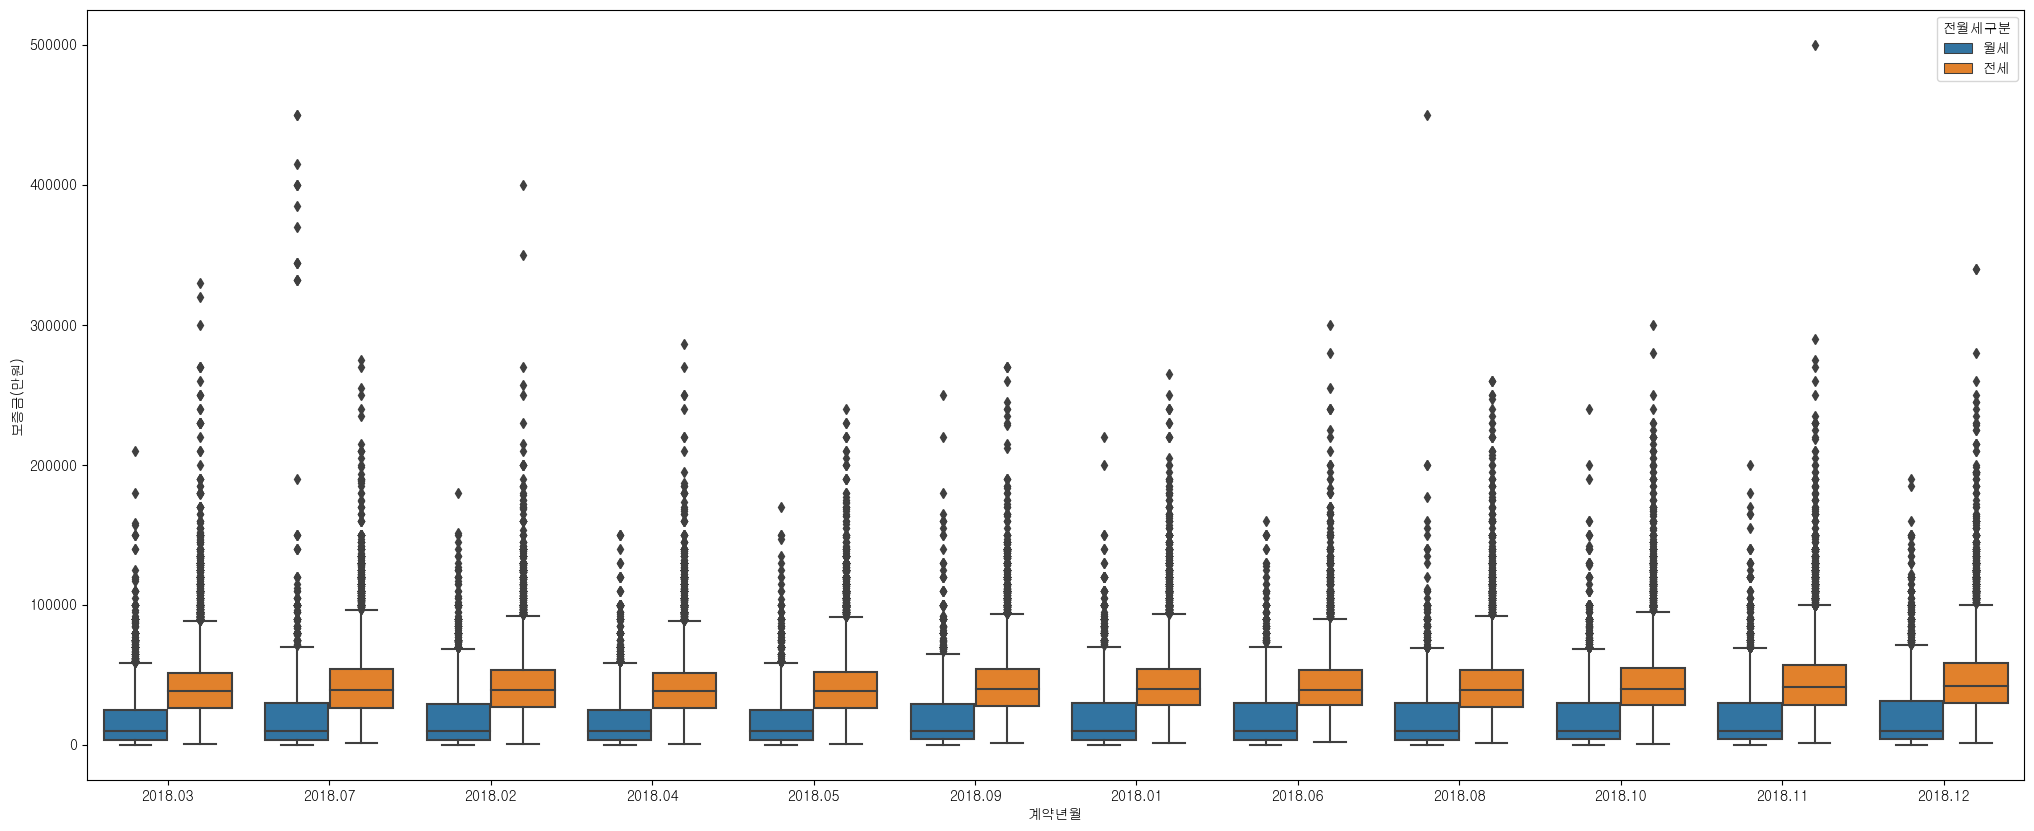

In [41]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='계약년월', y='보증금(만원)', hue='전월세구분', data=df2)
plt.show()


In [ ]:
#연별 전환율 불러오기
check_1 = pd.read_csv(
    r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/자치구별_전월세전환율_2018.csv")
check_1


In [ ]:
check_1.set_index('자치구별', inplace = True)
check_1

In [ ]:
df2
df2.info()

In [ ]:
df2


In [ ]:
#확인용
check_1[df2.loc[0]
        ['계약년월']][df2.loc[0]['자치구별']]


In [ ]:
#자치구별, 계약연도월 전월세전환비율을 df2 row에 추가
for i in range(len(df2)):
    df2.loc[i, '전월세변환율'] = check_1[df2.loc[i]['계약년월']][df2.loc[i]['자치구별']]
    #print(check_1[df2.loc[i]['계약년월']][df2.loc[i]['자치구별']])
    print(i)


In [ ]:
df2


In [ ]:
check_1

In [ ]:
#plt.hist(df2['거래금액(만원)'], bins=30)

sns.distplot(df1['보증금(만원)'], bins = 50)

plt.show()


In [ ]:
sns.distplot(df1['월세(만원)'], bins=30)


In [ ]:
df2

In [ ]:
#월세,전세변환금 = 보증금(만원) + (월세(만원) * 12개월) / 지역별 전월세전환율
# 거래금액(만원) 데이터 변환

df2["거래금액(만원)"] = (df2["보증금(만원)"] + (df2["월세(만원)"]*12)/df2["전월세변환율"]).round(0)

df2


In [ ]:
check_1

In [ ]:
# 전용면적당 거래금액(만원)
df2['1m^2 전용면적당 거래금액(만원)'] = (df2['거래금액(만원)'] / df2['전용면적(㎡)']).astype(int)
df2.head()


In [ ]:
df2.info()

In [ ]:
#계약년월 -> 계약연도, 계약월로 나누기
df2['계약년월'] = df2['계약년월'].str.replace(".", "").astype(int)
df2['계약연도'] = df2['계약년월'] // 100
df2['계약월'] = df2['계약년월'] % 100


In [ ]:
df2.head()

In [ ]:
#중간포인트 저장
df2.to_csv(
    r"C:/seokwonna/프로젝트/save_point2_apt_rent_2018_data.csv", encoding='utf-8')


In [ ]:
df2 = pd.read_csv(r"C:/seokwonna/프로젝트/save_point2_apt_rent_2018_data.csv", index_col = 0)
df2


In [ ]:
df2.columns
df2.info()

In [ ]:
# 컬럼의 순서(위치) 바꾸기
cols = ['자치구별', '계약연도', '계약월', '전월세구분',
        '전용면적(㎡)','거래금액(만원)', '1m^2 전용면적당 거래금액(만원)']
df3 = pd.DataFrame(df2, columns=cols)
df3


In [ ]:
#group_by 사용해서 자치구별 + 계약년월 대비 전용면적당 거래금액(만원) 평균 df으로 구성
df4 = df3.groupby([df3.자치구별, df3.계약월]).mean().round(0)
df4



In [ ]:
unique_values = df3['자치구별'].unique()
print(unique_values)
print(unique_values.size)


In [ ]:
#자치구 월별 매매된 평균 아파트 매매가, 1m^2 전용면적당 평균가
df4.to_csv(r"C:/seokwonna/프로젝트/save_point3_apt_rent_2018_data.csv", encoding='utf-8')


In [ ]:
df5 = df3.groupby([df3.자치구별]).mean().round(0)
df5


In [ ]:
#서울시 수치화된 데이터 평균가 추가
df5.loc['평균'] = df5.mean().round(0)
df5


In [ ]:
#2018년 자치구별 매매된 평균 아파트 전세 및 월세가, 1m^2 전용면적당 평균가
df5.to_csv(
    r"C:/seokwonna/프로젝트/save_point4_apt_rent_2018_data.csv", encoding='utf-8')


In [ ]:
#데이터 불러와서 확인하기
check_1 = pd.read_csv(r"C:/seokwonna/프로젝트/save_point3_apt_rent_2018_data.csv", encoding='utf-8')
check_2 = pd.read_csv(r"C:/seokwonna/프로젝트/save_point4_apt_rent_2018_data.csv", encoding='utf-8')

In [ ]:
check_1

In [ ]:
#계약월 데이터 무시하세요
check_2